In [1]:
# https://s3-eu-west-1.amazonaws.com/ih-materials/uploads/data-static/data/module-3/BreadBasket_DMS.csv.zip

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

breadbasket = pd.read_csv('./BreadBasket_DMS.csv')
breadbasket.dtypes

Date           object
Time           object
Transaction     int64
Item           object
dtype: object

In [2]:
breadbasket.head(15)

,Date,Time,Transaction,Item
0,2016-10-30,09:58:11,1,Bread
1,2016-10-30,10:05:34,2,Scandinavian
2,2016-10-30,10:05:34,2,Scandinavian
3,2016-10-30,10:07:57,3,Hot chocolate
4,2016-10-30,10:07:57,3,Jam
5,2016-10-30,10:07:57,3,Cookies
6,2016-10-30,10:08:41,4,Muffin
7,2016-10-30,10:13:03,5,Coffee
8,2016-10-30,10:13:03,5,Pastry
9,2016-10-30,10:13:03,5,Bread


In [3]:
display(breadbasket.describe())
display(breadbasket.shape)

,Transaction
count,21293.000000
mean,4951.990889
std,2787.758400
min,1.000000
25%,2548.000000
50%,5067.000000
75%,7329.000000
max,9684.000000


(21293, 4)

In [4]:
breadbasket['DateTime'] = pd.to_datetime(breadbasket.Date + ' ' + breadbasket.Time)
bsk_df = breadbasket.drop(columns=['Date','Time'])
bsk_df.head(15)

,Transaction,Item,DateTime
0,1,Bread,2016-10-30 09:58:11
1,2,Scandinavian,2016-10-30 10:05:34
2,2,Scandinavian,2016-10-30 10:05:34
3,3,Hot chocolate,2016-10-30 10:07:57
4,3,Jam,2016-10-30 10:07:57
5,3,Cookies,2016-10-30 10:07:57
6,4,Muffin,2016-10-30 10:08:41
7,5,Coffee,2016-10-30 10:13:03
8,5,Pastry,2016-10-30 10:13:03
9,5,Bread,2016-10-30 10:13:03


In [5]:
display(breadbasket.Item.unique())
display(breadbasket.Item.value_counts())


array(['Bread', 'Scandinavian', 'Hot chocolate', 'Jam', 'Cookies',
       'Muffin', 'Coffee', 'Pastry', 'Medialuna', 'Tea', 'NONE',
       'Tartine', 'Basket', 'Mineral water', 'Farm House', 'Fudge',
       'Juice', "Ella's Kitchen Pouches", 'Victorian Sponge', 'Frittata',
       'Hearty & Seasonal', 'Soup', 'Pick and Mix Bowls', 'Smoothies',
       'Cake', 'Mighty Protein', 'Chicken sand', 'Coke',
       'My-5 Fruit Shoot', 'Focaccia', 'Sandwich', 'Alfajores', 'Eggs',
       'Brownie', 'Dulce de Leche', 'Honey', 'The BART', 'Granola',
       'Fairy Doors', 'Empanadas', 'Keeping It Local', 'Art Tray',
       'Bowl Nic Pitt', 'Bread Pudding', 'Adjustment', 'Truffles',
       'Chimichurri Oil', 'Bacon', 'Spread', 'Kids biscuit', 'Siblings',
       'Caramel bites', 'Jammie Dodgers', 'Tiffin', 'Olum & polenta',
       'Polenta', 'The Nomad', 'Hack the stack', 'Bakewell',
       'Lemon and coconut', 'Toast', 'Scone', 'Crepes', 'Vegan mincepie',
       'Bare Popcorn', 'Muesli', 'Crisps', 'Pi

Coffee                           5471
Bread                            3325
Tea                              1435
Cake                             1025
Pastry                            856
NONE                              786
Sandwich                          771
Medialuna                         616
Hot chocolate                     590
Cookies                           540
Brownie                           379
Farm House                        374
Muffin                            370
Juice                             369
Alfajores                         369
Soup                              342
Scone                             327
Toast                             318
Scandinavian                      277
Truffles                          193
Coke                              185
Spanish Brunch                    172
Fudge                             159
Baguette                          152
Jam                               149
Tiffin                            146
Mineral wate

In [6]:
cat = {
    'beverage':['Hot chocolate', 'Coffee', 'Tea', 'Mineral water', 'Juice', 'Coke', 'Smoothies'],
    'other':['NONE', 'Christmas common', 'Gift voucher', "Valentine's card", 'Tshirt', 'Afternoon with the baker', 'Postcard', 'Siblings', 'Nomad bag', 'Adjustment', 'Drinking chocolate spoons ', 'Coffee granules '],
    'kids':["Ella's Kitchen Pouches", 'My-5 Fruit Shoot', 'Kids biscuit'],
    'snacks':['Mighty Protein', 'Pick and Mix Bowls', 'Caramel bites', 'Bare Popcorn', 'Crisps', 'Cherry me Dried fruit', 'Raw bars'],
    'bread':['Bread', 'Toast', 'Baguette', 'Focaccia', 'Scandinavian'],
    'breakfast_pastry':['Muffin', 'Pastry', 'Medialuna', 'Scone'],
    'dessert':['Cookies', 'Tartine', 'Fudge', 'Victorian Sponge', 'Cake', 'Alfajores', 'Brownie', 'Bread Pudding', 'Bakewell', 'Raspberry shortbread sandwich', 'Lemon and coconut', 'Crepes', 'Chocolates', 'Truffles', 'Panatone'],
    'condiments':['Jam', 'Dulce de Leche', 'Honey', 'Gingerbread syrup', 'Extra Salami or Feta', 'Bacon', 'Spread', 'Chimichurri Oil'],
    'breakfast':['Eggs', 'Frittata', 'Granola', 'Muesli', 'Duck egg', 'Brioche and salami'],
    'lunch':['Soup', 'Sandwich', 'Chicken sand', 'Salad', 'Chicken Stew']
}

notin = [e for i in cat.values() for e in i]

cat['other_food'] = [x for x in bsk_df.Item.unique() if x not in notin]
display(cat.keys())





dict_keys(['beverage', 'other', 'kids', 'snacks', 'bread', 'breakfast_pastry', 'dessert', 'condiments', 'breakfast', 'lunch', 'other_food'])

In [7]:
conditions = ['beverage','other','kids','snacks',
              'bread','breakfast_pastry','dessert',
              'condiments','breakfast','lunch','other_food'] 

for category_key in cat.keys():
    elements = cat[category_key]
    bsk_df[category_key] = np.where(bsk_df.Item.isin(elements), 1, 0)

In [8]:
bsk_df.head(10)

,Transaction,Item,DateTime,beverage,other,kids,snacks,bread,breakfast_pastry,dessert,condiments,breakfast,lunch,other_food
0,1,Bread,2016-10-30 09:58:11,0,0,0,0,1,0,0,0,0,0,0
1,2,Scandinavian,2016-10-30 10:05:34,0,0,0,0,1,0,0,0,0,0,0
2,2,Scandinavian,2016-10-30 10:05:34,0,0,0,0,1,0,0,0,0,0,0
3,3,Hot chocolate,2016-10-30 10:07:57,1,0,0,0,0,0,0,0,0,0,0
4,3,Jam,2016-10-30 10:07:57,0,0,0,0,0,0,0,1,0,0,0
5,3,Cookies,2016-10-30 10:07:57,0,0,0,0,0,0,1,0,0,0,0
6,4,Muffin,2016-10-30 10:08:41,0,0,0,0,0,1,0,0,0,0,0
7,5,Coffee,2016-10-30 10:13:03,1,0,0,0,0,0,0,0,0,0,0
8,5,Pastry,2016-10-30 10:13:03,0,0,0,0,0,1,0,0,0,0,0
9,5,Bread,2016-10-30 10:13:03,0,0,0,0,1,0,0,0,0,0,0


In [9]:
bread_group = bsk_df.groupby(['Transaction','DateTime']).sum()
bread_group.reset_index(level=['DateTime'], inplace=True)
bread_group.head(10)

,DateTime,beverage,other,kids,snacks,bread,breakfast_pastry,dessert,condiments,breakfast,lunch,other_food
Transaction,,,,,,,,,,,,
1,2016-10-30 09:58:11,0,0,0,0,1,0,0,0,0,0,0
2,2016-10-30 10:05:34,0,0,0,0,2,0,0,0,0,0,0
3,2016-10-30 10:07:57,1,0,0,0,0,0,1,1,0,0,0
4,2016-10-30 10:08:41,0,0,0,0,0,1,0,0,0,0,0
5,2016-10-30 10:13:03,1,0,0,0,1,1,0,0,0,0,0
6,2016-10-30 10:16:55,0,0,0,0,0,3,0,0,0,0,0
7,2016-10-30 10:19:12,2,0,0,0,0,2,0,0,0,0,0
8,2016-10-30 10:20:51,0,0,0,0,1,1,0,0,0,0,0
9,2016-10-30 10:21:59,0,0,0,0,1,1,0,0,0,0,0


In [10]:
bread_group['hour'] = bread_group.DateTime.dt.hour
bread_group['day'] = bread_group.DateTime.dt.day_name()
display(bread_group.day.value_counts())
display(bread_group.hour.value_counts().sort_index())
display(bread_group.hour.value_counts())
display(bread_group.head(10))

Saturday     2068
Friday       1488
Sunday       1264
Thursday     1252
Tuesday      1203
Monday       1135
Wednesday    1121
Name: day, dtype: int64

1        1
7       16
8      375
9     1007
10    1267
11    1445
12    1347
13    1163
14    1130
15     924
16     583
17     160
18      52
19      34
20      15
21       2
22       7
23       3
Name: hour, dtype: int64

11    1445
12    1347
10    1267
13    1163
14    1130
9     1007
15     924
16     583
8      375
17     160
18      52
19      34
7       16
20      15
22       7
23       3
21       2
1        1
Name: hour, dtype: int64

,DateTime,beverage,other,kids,snacks,bread,breakfast_pastry,dessert,condiments,breakfast,lunch,other_food,hour,day
Transaction,,,,,,,,,,,,,,
1,2016-10-30 09:58:11,0,0,0,0,1,0,0,0,0,0,0,9,Sunday
2,2016-10-30 10:05:34,0,0,0,0,2,0,0,0,0,0,0,10,Sunday
3,2016-10-30 10:07:57,1,0,0,0,0,0,1,1,0,0,0,10,Sunday
4,2016-10-30 10:08:41,0,0,0,0,0,1,0,0,0,0,0,10,Sunday
5,2016-10-30 10:13:03,1,0,0,0,1,1,0,0,0,0,0,10,Sunday
6,2016-10-30 10:16:55,0,0,0,0,0,3,0,0,0,0,0,10,Sunday
7,2016-10-30 10:19:12,2,0,0,0,0,2,0,0,0,0,0,10,Sunday
8,2016-10-30 10:20:51,0,0,0,0,1,1,0,0,0,0,0,10,Sunday
9,2016-10-30 10:21:59,0,0,0,0,1,1,0,0,0,0,0,10,Sunday


In [11]:
bread_days = pd.get_dummies(data=bread_group, columns=['day'])
bread_days.drop(columns='DateTime', inplace=True, axis=1)
display(bread_days.head(10))

,beverage,other,kids,snacks,bread,breakfast_pastry,dessert,condiments,breakfast,lunch,other_food,hour,day_Friday,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday
Transaction,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,1,0,0,0,0,0,0,9,0,0,0,1,0,0,0
2,0,0,0,0,2,0,0,0,0,0,0,10,0,0,0,1,0,0,0
3,1,0,0,0,0,0,1,1,0,0,0,10,0,0,0,1,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0,10,0,0,0,1,0,0,0
5,1,0,0,0,1,1,0,0,0,0,0,10,0,0,0,1,0,0,0
6,0,0,0,0,0,3,0,0,0,0,0,10,0,0,0,1,0,0,0
7,2,0,0,0,0,2,0,0,0,0,0,10,0,0,0,1,0,0,0
8,0,0,0,0,1,1,0,0,0,0,0,10,0,0,0,1,0,0,0
9,0,0,0,0,1,1,0,0,0,0,0,10,0,0,0,1,0,0,0


In [12]:
from sklearn.decomposition import PCA

pca = PCA(n_components=6)

principalComponents = pca.fit_transform(bread_days)
principalDf = pd.DataFrame(data = principalComponents
             ,columns = ['pc1', 'pc2','pc3','pc4', 'pc5','pc6'])
display(principalDf.head())
display(principalDf.shape)

,pc1,pc2,pc3,pc4,pc5,pc6
0,3.197413,-0.926669,0.244933,0.005980,-0.171734,-0.214524
1,2.227896,-1.274346,1.183371,-0.159231,-0.074412,-0.311648
2,2.107647,0.424883,-0.219787,0.879780,-0.144737,-0.144674
3,2.198960,-0.580674,-0.783351,-0.031004,0.694033,-0.404917
4,2.206812,0.037385,0.443747,-0.333643,0.731338,-0.481954


(9531, 6)

In [13]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4)
bread_clusters = kmeans.fit(principalDf)
bread_clusters.cluster_centers_

array([[ 6.78082646e-01,  1.33340776e-02,  5.83013794e-03,
        -1.13152895e-03, -2.25215428e-02,  7.26389782e-03],
       [-3.60462547e+00, -1.92471415e-02,  3.54627590e-02,
         5.46534769e-03,  6.16040543e-02, -1.46398213e-02],
       [ 2.84929380e+00, -9.92513645e-03, -8.66242180e-04,
        -1.01881640e-04,  3.94603892e-02,  6.64730187e-03],
       [-1.34024888e+00,  1.02449111e-02, -3.36206081e-02,
        -2.74639058e-03, -6.62784417e-02, -5.20873424e-03]])

In [14]:
bread_days['labels'] = bread_clusters.fit_predict(principalDf)
bread_days.reset_index('Transaction', inplace=True)
bread_merged = pd.merge(bsk_df, bread_days[['Transaction', 'labels']], on='Transaction', how='outer')
bread_merged.head()

,Transaction,Item,DateTime,beverage,other,kids,snacks,bread,breakfast_pastry,dessert,condiments,breakfast,lunch,other_food,labels
0,1,Bread,2016-10-30 09:58:11,0,0,0,0,1,0,0,0,0,0,0,2
1,2,Scandinavian,2016-10-30 10:05:34,0,0,0,0,1,0,0,0,0,0,0,2
2,2,Scandinavian,2016-10-30 10:05:34,0,0,0,0,1,0,0,0,0,0,0,2
3,3,Hot chocolate,2016-10-30 10:07:57,1,0,0,0,0,0,0,0,0,0,0,2
4,3,Jam,2016-10-30 10:07:57,0,0,0,0,0,0,0,1,0,0,0,2


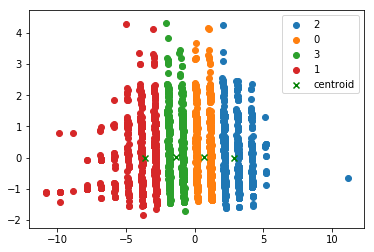

In [15]:
df = pd.concat([principalDf, bread_days], axis=1)
# print data with different categories
for l in df['labels'].unique():
    q = df[df['labels']==l]
    plt.scatter(q['pc1'],q['pc2'], label=l)

# print cluster centers
x = [e[0] for e in bread_clusters.cluster_centers_]
y = [e[1] for e in bread_clusters.cluster_centers_]
plt.scatter(x,y, color='green', marker='x', label="centroid")

plt.legend()


In [16]:
pd.crosstab(bread_days.hour,bread_days.labels)


labels,0,1,2,3
hour,,,,
1,0,0,1,0
7,0,0,16,0
8,0,0,375,0
9,0,0,1007,0
10,0,0,1267,0
11,1445,0,0,0
12,1347,0,0,0
13,0,0,0,1163
14,0,0,0,1130


In [20]:
pd.crosstab(bread_group.day,bread_days.labels)


labels,0,1,2,3
day,,,,
Friday,458,269,378,363
Monday,294,232,358,251
Saturday,599,411,451,514
Sunday,381,209,333,309
Thursday,368,194,423,267
Tuesday,368,223,337,275
Wednesday,269,213,351,288


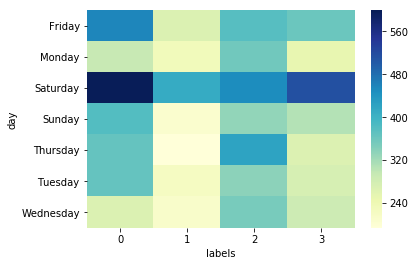

In [21]:
import seaborn as sns

sns.heatmap(pd.crosstab(bread_group.day,bread_days.labels), cmap="YlGnBu")

In [23]:
display(bread_merged.head())
a = bread_merged.groupby(['labels']).Item.value_counts()
b = a.to_frame("counts").reset_index()
b.set_index("Item", inplace=True)
b.groupby('labels').counts.nlargest(8)

,Transaction,Item,DateTime,beverage,other,kids,snacks,bread,breakfast_pastry,dessert,condiments,breakfast,lunch,other_food,labels
0,1,Bread,2016-10-30 09:58:11,0,0,0,0,1,0,0,0,0,0,0,2
1,2,Scandinavian,2016-10-30 10:05:34,0,0,0,0,1,0,0,0,0,0,0,2
2,2,Scandinavian,2016-10-30 10:05:34,0,0,0,0,1,0,0,0,0,0,0,2
3,3,Hot chocolate,2016-10-30 10:07:57,1,0,0,0,0,0,0,0,0,0,0,2
4,3,Jam,2016-10-30 10:07:57,0,0,0,0,0,0,0,1,0,0,0,2


labels  Item         
0       Coffee           1686
        Bread            1002
        Tea               359
        NONE              281
        Cake              260
        Pastry            248
        Sandwich          215
        Medialuna         163
1       Coffee            927
        Bread             560
        Tea               382
        Cake              328
        Hot chocolate     183
        Cookies           157
        Alfajores         128
        Sandwich          109
2       Coffee           1615
        Bread            1082
        Pastry            453
        Medialuna         294
        Tea               280
        NONE              201
        Toast             149
        Hot chocolate     141
3       Coffee           1243
        Bread             681
        Tea               414
        Sandwich          405
        Cake              306
        NONE              255
        Soup              184
        Hot chocolate     119
Name: counts, dtyp